# Data Cleaning
Brandon Shellenberger

In [ ]:
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns

## Making Global Variables

In [ ]:
PROJECT_ROOT = pathlib.Path().parent.parent
DATA_FOLDER = PROJECT_ROOT.joinpath('data')
# Used Excel to clear out data to reduce dropping of NaNs
# Now each city has 108 entries, enough for regression analysis
TIME_SERIES_DATA = DATA_FOLDER.joinpath('zillow_time_series_cleaned.csv')
HOUSE_PRICING_DATA = DATA_FOLDER.joinpath('kaggle_house_pricing.csv')

## Cleaning Zillow Data
Make sure to record everything for the write up.

### Handling with NaN, Duplicates, unrelated columns, renaming columns

In [ ]:
zillow_ts = pd.read_csv(TIME_SERIES_DATA)

# Dropping columns, NaNs, and duplicates
zillow_dropping = zillow_ts.drop(columns=['RegionID', 'StateName', 'RegionType', 'SizeRank']).dropna().drop_duplicates()

# Setting the first column as the index, transpose (.T), rename index to date, reset index, rename index as None
zillow_transposed = zillow_dropping.set_index(zillow_dropping.columns[0]).T.rename_axis('date').reset_index().rename_axis(None, axis=1)

# Changing date column data types to datetime
zillow_transposed['date'] = pd.to_datetime(zillow_transposed['date'])

zillow_clean_df = zillow_transposed

print(zillow_clean_df.head(5))

### Looking for outliers
With time-series data, there should not be any outliers.

In [ ]:
sns.lineplot(data=zillow_clean_df, x='date', y='Lawrence, KS', color='red')
sns.lineplot(data=zillow_clean_df, x='date', y='Wichita, KS', color='blue')
plt.xlabel('Date')
plt.ylabel('Median Price of Single Family Houses')

## Cleaning Kaggle Data

In [ ]:
kaggle_ml = pd.read_csv(HOUSE_PRICING_DATA)
print(kaggle_ml.head(3))
# print(kaggle_ml.shape)
# print(kaggle_ml.dtypes)
print(kaggle_ml.describe())

# Checked for null values, there are none
# print(kaggle_ml.isnull().sum())

# Checked for duplicates, there are none
# print(kaggle_ml.duplicated().sum())

# All columns are lowercase

### Frequencies of numerical data

mainroad
yes    468
no      77
Name: count, dtype: int64


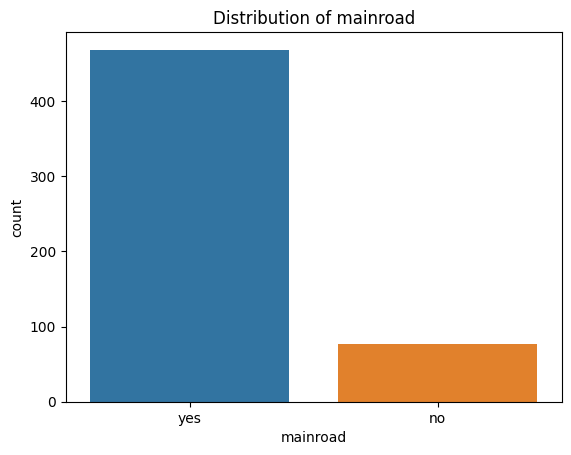

guestroom
no     448
yes     97
Name: count, dtype: int64


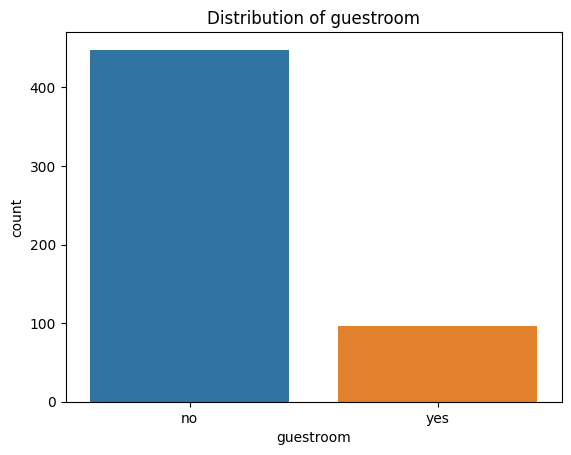

basement
no     354
yes    191
Name: count, dtype: int64


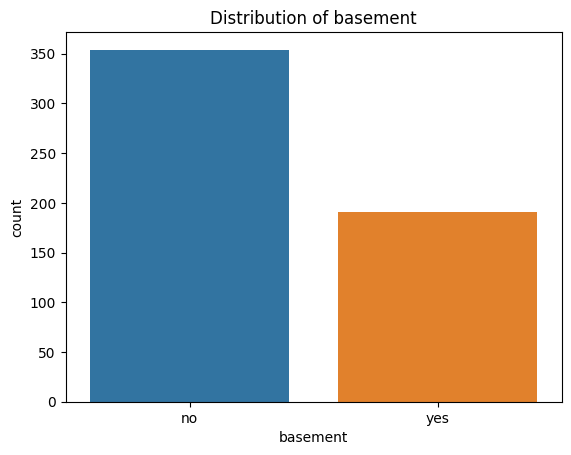

hotwaterheating
no     520
yes     25
Name: count, dtype: int64


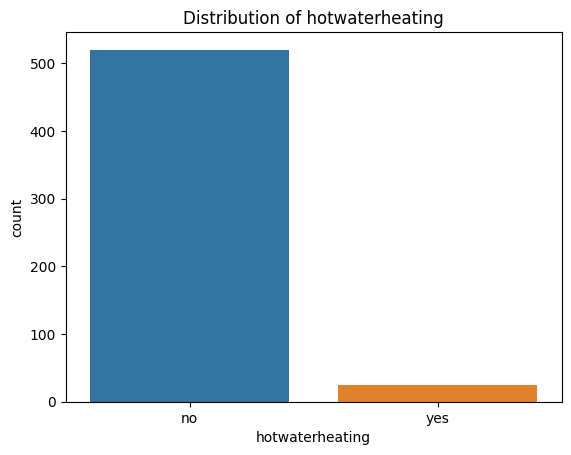

airconditioning
no     373
yes    172
Name: count, dtype: int64


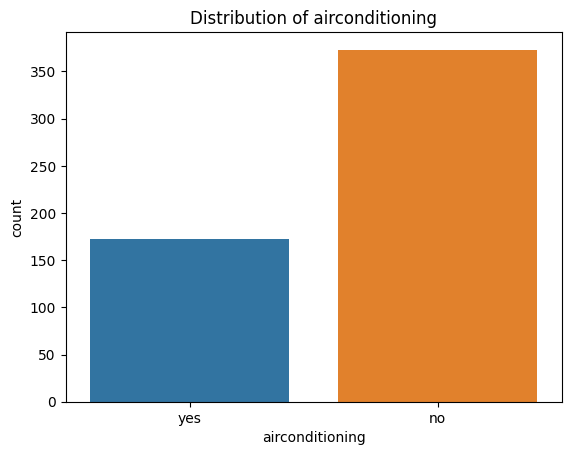

prefarea
no     417
yes    128
Name: count, dtype: int64


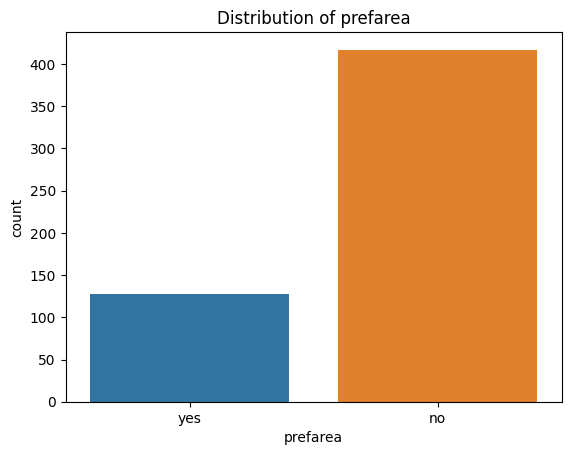

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


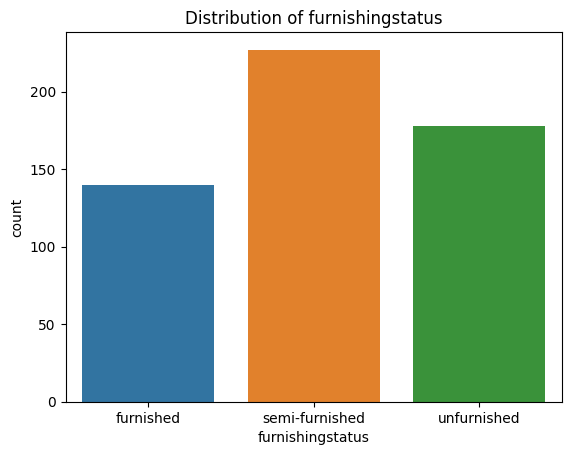

In [17]:
# Frequency chart for numerical data
# kaggle_ml.hist(bins=30)

# Frequency chart for categorical data
# # Using this to determine variables for regression
for col in kaggle_ml.select_dtypes(include=['object', 'category']).columns:
    print(kaggle_ml[col].value_counts())
    # Display count chart
    sns.countplot(data=kaggle_ml, x=col, hue=col)
    plt.title(f'Distribution of {col}')
    plt.show()

# Variables to use
# Bedrooms, Bathrooms, Stories, Basement, Air Conditioning, Furnishing

### Clearing unwanted data and Hot Encoding Categorica data

In [ ]:
kaggle_dropped_col = kaggle_ml.drop(columns=['area', 'mainroad', 'guestroom', 'hotwaterheating', 'parking', 'prefarea'])

# One-Hot-Encoding
# Encoding basement and air conditioning as 2 columns (yes and not)
# Encoding furnishing as 3 columns (furnished, semi-furnished, unfurnished)


      price  bedrooms  bathrooms  stories basement airconditioning  \
0  13300000         4          2        3       no             yes   
1  12250000         4          4        4       no             yes   
2  12250000         3          2        2      yes              no   

  furnishingstatus  
0        furnished  
1        furnished  
2   semi-furnished  
